In [1]:
from datasets import load_dataset

/Users/aryopg/miniconda3/envs/clinical_peft/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
mortality_dataset = load_dataset("aryopg/trec-mortality")
los_dataset = load_dataset("aryopg/trec-los")
pmv_dataset = load_dataset("aryopg/trec-pmv")
diagnosis_dataset = load_dataset("aryopg/core-diagnosis")
procedure_dataset = load_dataset("aryopg/core-procedure")

Found cached dataset csv (/Users/aryopg/.cache/huggingface/datasets/aryopg___csv/aryopg--trec-mortality-f5f91328d52bd1aa/0.0.0/6954658bab30a358235fa864b05cf819af0e179325c740e4bc853bcc7ec513e1)
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 478.67it/s]
Found cached dataset csv (/Users/aryopg/.cache/huggingface/datasets/aryopg___csv/aryopg--trec-los-423a42248e1a8295/0.0.0/6954658bab30a358235fa864b05cf819af0e179325c740e4bc853bcc7ec513e1)
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 250.08it/s]
Found cached dataset csv (/Users/aryopg/.cache/huggingface/datasets/aryopg___csv/aryopg--trec-pmv-ec462eb997d3148c/0.0.0/6954658bab30a358235fa864b05cf819af0e179325c740e4bc853bcc7ec513e1)
100%|██████

In [3]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained(
    "aryopg/llama-7b"
)

In [25]:
import seaborn as sns

def get_seq_length(dataset, column="text"):
    sequence_lengths = [len(tokenizer(example, truncation=False, padding=False)["input_ids"]) for example in dataset["train"][column]]
    sns.histplot(sequence_lengths, kde=True)
    return sequence_lengths

def describe(seq_length):
    # Compute the maximum value
    print(f"max: {max(seq_length)}")
    # Compute the minimum value
    print(f"min: {min(seq_length)}")
    
    # Compute the mean value
    print(f"mean: {sum(seq_length) / len(seq_length)}")
    
    # Compute the median value
    sorted_seq_length = sorted(seq_length)
    n = len(sorted_seq_length)
    if n % 2 == 0:
        print(f"median: {(sorted_seq_length[n//2 - 1] + sorted_seq_length[n//2]) / 2}")
    else:
        print(f"median: {sorted_seq_length[n//2]}")

mortality
max: 22211
min: 84
mean: 889.7919538198739
median: 804.0


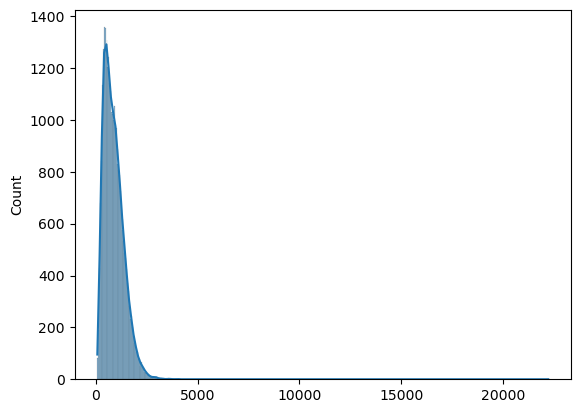

In [16]:
print("mortality")
sequence_lengths = get_seq_length(mortality_dataset)
describe(sequence_lengths)

los
max: 8051
min: 84
mean: 881.7999079583183
median: 794


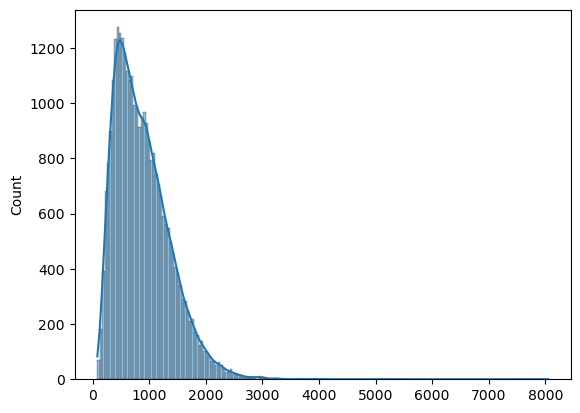

In [17]:
print("los")
sequence_lengths = get_seq_length(los_dataset)
describe(sequence_lengths)

pmv
max: 6529
min: 86
mean: 816.581009530533
median: 720.0


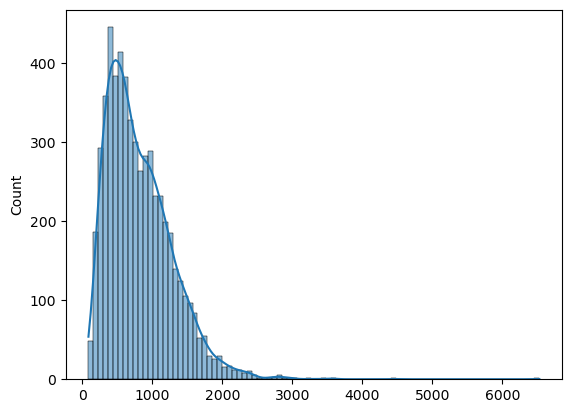

In [18]:
print("pmv")
sequence_lengths = get_seq_length(pmv_dataset)
describe(sequence_lengths)

diagnosis
max: 22211
min: 84
mean: 889.9248985115021
median: 804.0


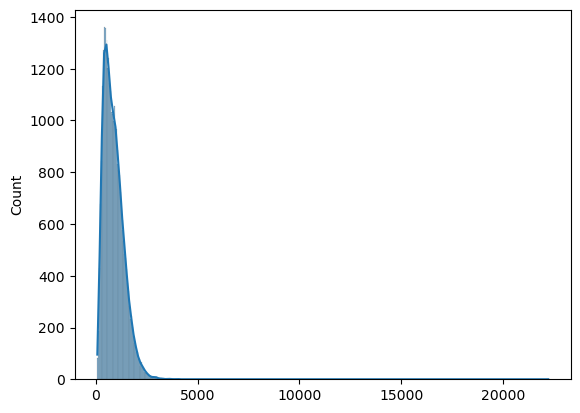

In [19]:
print("diagnosis")
sequence_lengths = get_seq_length(diagnosis_dataset)
describe(sequence_lengths)

procedure
max: 22211
min: 84
mean: 869.7317682317682
median: 774.0


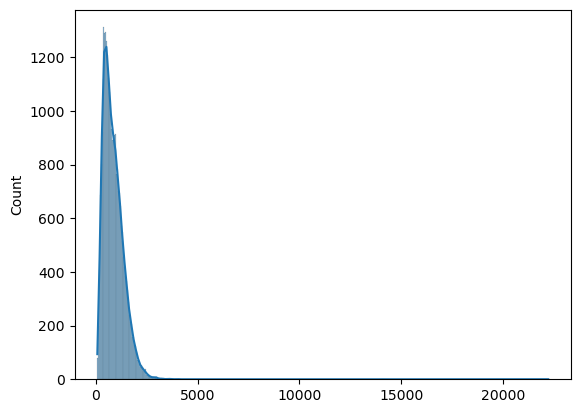

In [20]:
print("procedure")
sequence_lengths = get_seq_length(procedure_dataset)
describe(sequence_lengths)

In [27]:
radqa_dataset = load_dataset("aryopg/radqa")

Found cached dataset csv (/Users/aryopg/.cache/huggingface/datasets/aryopg___csv/aryopg--radqa-460e1a0c474260ef/0.0.0/6954658bab30a358235fa864b05cf819af0e179325c740e4bc853bcc7ec513e1)
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 576.59it/s]


procedure
context
max: 1968
min: 5
mean: 169.1082410824108
median: 124.0
question
max: 29
min: 4
mean: 12.460434604346043
median: 12.0


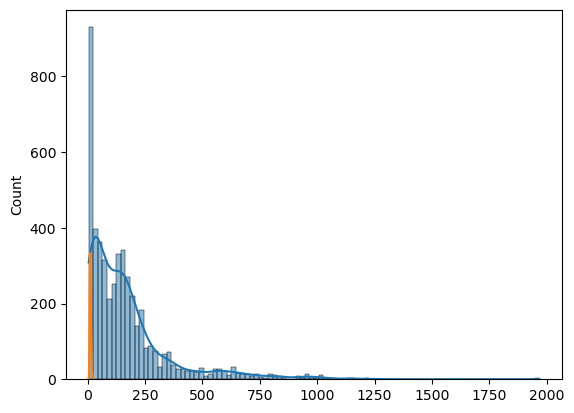

In [28]:
print("procedure")

context_sequence_lengths = get_seq_length(radqa_dataset, column="context")
print("context")
describe(context_sequence_lengths)

question_sequence_lengths = get_seq_length(radqa_dataset, column="question")
print("question")
describe(question_sequence_lengths)